In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings(action='ignore')

##   펀다 상점매출 예측 경진대회 ##

### 문제 ###


 핀테크 기업인 ‘FUNDA(펀다)’는 상환 기간의 매출을 예측하여 신용 점수가 낮거나 담보를 가지지 못하는 우수 상점들에 금융 기회를 제공하려 합니다.

이번 대회에서는 2년 전 부터 2019년 2월 28일까지의 카드 거래 데이터를 이용해 2019-03-01부터 2019-05-31까지의 각 상점별 3개월 총 매출을 예측하는 것입니다.

In [10]:
df = pd.read_csv(r'funda_train.csv', encoding='utf-8-sig')
print(df)

         store_id  ...       amount
0               0  ...  1857.142857
1               0  ...   857.142857
2               0  ...  2000.000000
3               0  ...  7857.142857
4               0  ...  2000.000000
...           ...  ...          ...
6556608      2136  ... -4500.000000
6556609      2136  ...  4142.857143
6556610      2136  ...  4500.000000
6556611      2136  ...   571.428571
6556612      2136  ...  5857.142857

[6556613 rows x 9 columns]


In [12]:
pd.set_option('display.max_columns', 15)
df.head()

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,NaN,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,NaN,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,NaN,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,NaN,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,NaN,기타 미용업,2000.000000


In [14]:
df.info()
#자료형 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6556613 entries, 0 to 6556612
Data columns (total 9 columns):
 #   Column            Dtype  
---  ------            -----  
 0   store_id          int64  
 1   card_id           int64  
 2   card_company      object 
 3   transacted_date   object 
 4   transacted_time   object 
 5   installment_term  int64  
 6   region            object 
 7   type_of_business  object 
 8   amount            float64
dtypes: float64(1), int64(3), object(5)
memory usage: 450.2+ MB


In [17]:
df.isnull().sum()
#결측치 확인

store_id                  0
card_id                   0
card_company              0
transacted_date           0
transacted_time           0
installment_term          0
region              2042766
type_of_business    3952609
amount                    0
dtype: int64

In [24]:
df['installment_term'].value_counts()#할부기간

0     6327632
3      134709
2       42101
5       23751
6       10792
10       6241
4        4816
12       2699
60       1290
7         553
8         413
24        404
9         349
18        332
15        130
20        116
80         83
11         47
30         43
36         36
16         23
14         12
63          8
83          6
65          6
72          4
19          4
13          3
82          2
35          2
23          2
93          2
22          1
17          1
Name: installment_term, dtype: int64

In [22]:
df['store_id'].value_counts()

1330    9518
1196    9471
1171    9391
710     9347
826     9328
        ... 
1974     429
1240     426
795      231
2119     112
1063      72
Name: store_id, Length: 1967, dtype: int64

In [20]:
df['region'].value_counts()

경기 수원시    122029
충북 청주시    116766
경남 창원시    107147
경남 김해시    100673
경기 평택시     82138
           ...  
경남 거창군      1143
서울 관악구      1037
경남 함안군       878
경북 영천시       849
전남 완도군       681
Name: region, Length: 180, dtype: int64

In [21]:
df['type_of_business'].value_counts()

한식 음식점업                     745905
두발 미용업                      178475
의복 소매업                      158234
기타 주점업                      102413
치킨 전문점                       89277
                             ...  
곡물 및 기타 식량작물 재배업               569
주방용품 및 가정용 유리, 요업 제품 소매업       551
배전반 및 전기 자동제어반 제조업             533
그 외 기타 생활용품 도매업                519
신선식품 및 단순 가공식품 도매업             231
Name: type_of_business, Length: 145, dtype: int64

### 결측치처리1: 0으로 채우기 ###


In [29]:
df0 = df.fillna(0)
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


In [30]:
df0.isnull().sum()

store_id            0
card_id             0
card_company        0
transacted_date     0
transacted_time     0
installment_term    0
region              0
type_of_business    0
amount              0
dtype: int64

In [31]:
df0

,store_id,card_id,card_company,transacted_date,transacted_time,installment_term,region,type_of_business,amount
0,0,0,b,2016-06-01,13:13,0,0,기타 미용업,1857.142857
1,0,1,h,2016-06-01,18:12,0,0,기타 미용업,857.142857
2,0,2,c,2016-06-01,18:52,0,0,기타 미용업,2000.000000
3,0,3,a,2016-06-01,20:22,0,0,기타 미용업,7857.142857
4,0,4,c,2016-06-02,11:06,0,0,기타 미용업,2000.000000
...,...,...,...,...,...,...,...,...,...
6556608,2136,4663855,d,2019-02-28,23:20,0,제주 제주시,기타 주점업,-4500.000000
6556609,2136,4663855,d,2019-02-28,23:24,0,제주 제주시,기타 주점업,4142.857143
6556610,2136,4663489,a,2019-02-28,23:24,0,제주 제주시,기타 주점업,4500.000000
6556611,2136,4663856,d,2019-02-28,23:27,0,제주 제주시,기타 주점업,571.428571


## 데이터 탐색 ##

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#이상치 탐색
# 거래일자, 거래시간
data = df0['transacted_date'], df0['transacted_time']

green_diamond = dict(markerfacecolor='r', marker='s')
plt.boxplot(data, flierprops=green_diamond)
plt.title('상점매출 거래일자 및 거래시간 이상치 탐색')
plt.show()

UFuncTypeError: ufunc 'multiply' did not contain a loop with signature matching types (dtype('<U32'), dtype('<U32')) -> dtype('<U32')

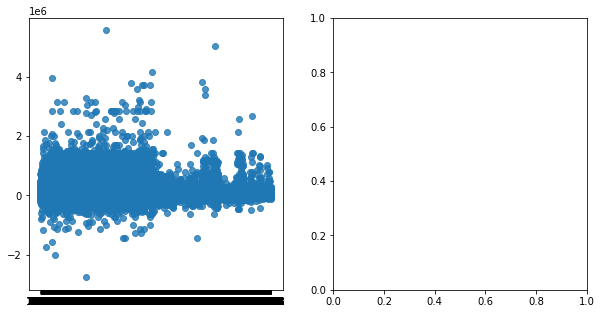

In [34]:
# 연비&중량 seaborn으로 산점도 그리기 + 회귀선 표시 
fig = plt.figure(figsize=(10, 5))
ax1 = fig.add_subplot(1, 2, 1)
ax2 = fig.add_subplot(1, 2, 2)
sns.regplot(x = 'transacted_time', y ='amount', data=df0, ax=ax1)#회귀선 표시
plt.show()
plt.close()


In [33]:
# 데이터프레임 열을 두 개씩 짝 지을 수 있는 모든 경우의 수에 대해 두 변수간의 산점도 그리기
# 자기 자신은 히스토그램
grid_df0 = sns.pairplot(df0)
plt.show()
plt.close()

KeyboardInterrupt: 

## 다중회귀분석 ##